<a href="https://colab.research.google.com/github/jangvu/Project_by_me/blob/main/_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np


In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train_full.shape
y_train_full.shape

(50000, 1)

In [ ]:
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
import matplotlib.pyplot as plt

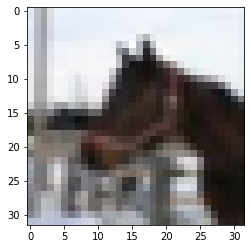

In [ ]:
plt.imshow(X_train[1])

In [ ]:
y_train.shape

(45000, 1)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
class_names[y_train[1].item()]

'horse'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape =[32,32,3]))
for _ in range(20):
  model.add(keras.layers.Dense(100,activation='elu',kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5,beta_1=0.9,beta_2=0.999)
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model.fit(X_train,y_train,epochs = 100, validation_data=(X_valid,y_valid),callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 17s 10ms/step - loss: 2.1349 - accuracy: 0.2415 - val_loss: 1.8691 - val_accuracy: 0.3254
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7364 - accuracy: 0.3750 - val_loss: 1.7132 - val_accuracy: 0.3818
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6398 - accuracy: 0.4123 - val_loss: 1.6488 - val_accuracy: 0.4090
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5792 - accuracy: 0.4321 - val_loss: 1.5981 - val_accuracy: 0.4216
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5345 - accuracy: 0.4480 - val_loss: 1.6000 - val_accuracy: 0.4390
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4884 - accuracy: 0.4658 - val_loss: 1.5364 - val_accuracy: 0.4470
Epoch 7/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.4703 - accuracy: 0.4736 - val_loss: 1.524

In [ ]:
model.evaluate(X_valid,y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.5292 - accuracy: 0.4732


[1.5292011499404907, 0.4731999933719635]

In [ ]:
model.save('my_cifar10_model.h5')

In [ ]:
model_bn = keras.models.Sequential()
model_bn.add(keras.layers.Flatten(input_shape=[32,32,3]))
model_bn.add(keras.layers.BatchNormalization())
for n_hidden in range(20):
  model_bn.add(keras.layers.Dense(100,kernel_initializer='he_normal'))
  model_bn.add(keras.layers.BatchNormalization())
  model_bn.add(keras.layers.Activation(activation='elu'))
model_bn.add(keras.layers.Dense(10,activation='softmax'))


In [ ]:
model_bn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
history = model_bn.fit(X_train,y_train,epochs = 100, validation_data=(X_valid,y_valid),callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 31s 16ms/step - loss: 2.0136 - accuracy: 0.2768 - val_loss: 1.6737 - val_accuracy: 0.3996
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7291 - accuracy: 0.3809 - val_loss: 1.5910 - val_accuracy: 0.4252
Epoch 3/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6465 - accuracy: 0.4076 - val_loss: 1.5522 - val_accuracy: 0.4478
Epoch 4/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6137 - accuracy: 0.4196 - val_loss: 1.5198 - val_accuracy: 0.4570
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5689 - accuracy: 0.4335 - val_loss: 1.4878 - val_accuracy: 0.4684
Epoch 6/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.5273 - accuracy: 0.4567 - val_loss: 1.4694 - val_accuracy: 0.4802
Epoch 7/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5069 - accuracy: 0.4657 - val_loss: 1

In [ ]:
model_bn.evaluate(X_valid,y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.5226


[1.3847808837890625, 0.522599995136261]

In [ ]:
model_selu = keras.models.Sequential()
model_selu.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
  model_selu.add(keras.layers.Dense(100,activation='selu',kernel_initializer='lecun_normal'))
model_selu.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model_selu.compile(optimizer = optimizer,loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [ ]:
history = model_selu.fit(X_train,y_train,epochs =100, validation_data=(X_valid,y_valid),callbacks=[early_stopping])

Epoch 1/100
1407/1407 [==============================] - 17s 10ms/step - loss: 2.0343 - accuracy: 0.2486 - val_loss: 1.8051 - val_accuracy: 0.3440
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7459 - accuracy: 0.3643 - val_loss: 1.6803 - val_accuracy: 0.3892
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6711 - accuracy: 0.3974 - val_loss: 1.6423 - val_accuracy: 0.4066
Epoch 4/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.6120 - accuracy: 0.4184 - val_loss: 1.5833 - val_accuracy: 0.4270
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5580 - accuracy: 0.4381 - val_loss: 1.5527 - val_accuracy: 0.4346
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5176 - accuracy: 0.4563 - val_loss: 1.5359 - val_accuracy: 0.4464
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4786 - accuracy: 0.4699 - val_loss: 1

In [ ]:
model_selu.evaluate(X_valid,y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4180 - accuracy: 0.5198


[1.4179660081863403, 0.5198000073432922]

In [ ]:
model_bn.save('my_cifar10_model_bn.h5')

In [ ]:
model_selu.save('my_cifar10_model_selu.h5')